# <center>**Analysis of Average Property Prices in England**
    
#### <center>by Kweku E. Acquaye.</center>

**Table of Contents**

1. Section 1: Introduction
  * Section 1.1: Outline
2. Section 2: Loading and Preparing the Data
  * Section 2.1: Loading Data
  * Section 2.2: Preparing Data
3. Section 3: Trends 
  * Section 3.1: Property Price Trends of Flats and Detached Houses in All Regions over 36 Months
  * Section 3.2: Visualisation of Property Price Trends
4. Section 4: Price Changes by Area
  * Section 4.1: Flat Price Changes between July 2017 and July 2018
  * Section 4.2: Visualisation of Change in Flat Prices by Area: 
5. Section 5: Statistical Analysis
  * Section 5.1: Cross-tabulation
  * Section 5.2: Chi-squared Test
  

## **Section 1: Introduction**
This report uses modern data science methods to analyse average property prices in England for insights and trends. It constitutes Coursework 3 in fulfilment of the requirements of Statistics for Data Science and AI module.

**Declaration:** Some of the code used in this report has been adapted and customized from www.docs.python.org/, www.matplotlib.org/stable/, www.pandas.pydata.org/docs, www.stackoverflow.com/questions/, www.geeksforgeeks.org/, www.kite.com/python/answers/, www.codegrepper.com/, www.machinelearningmind.com/, and Statistics for Data Science and AI Lecture, Lab and Tutorial Notes.

### **Section 1.1: Outline**
Given is a dataset of the average price of properties over 36 months in different areas of England. Also given is a different dataset of Area Codes defined by the Office for National Statistics (ONS) that reflect the
hierarchy of government in the UK. A simplified version is used.

### **Section 2: Loading and Preparing the Data**

### **Section 2.1: Loading Data**

In [ ]:
# Importing libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats

%matplotlib inline

print("Libraries imported.")

Libraries imported.


In [ ]:
# Loading original data
originalPrices_df1 = pd.read_csv('average-property-price.csv', error_bad_lines=False, warn_bad_lines=True)
originalLocation_df1 = pd.read_csv('location-codes.csv', error_bad_lines=False, warn_bad_lines=True)
print("Original data loaded.")

Original data loaded.


To preserve integrity of original data file from accidental alteration, analysis would be carried out on a copy.

In [ ]:
# Creating copy to preserve original Prices data file
safePrices_df1 = originalPrices_df1.copy()
print("Copied 'average-property-price' version created as follows:")
safePrices_df1.head()

Copied 'average-property-price' version created as follows:


,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795


In [ ]:
# Creating copy to preserve original Location data file
safeLocation_df1 = originalLocation_df1.copy()
print("Copied 'location-codes' version created as follows:\n")
safeLocation_df1.head()

Copied 'location-codes' version created as follows:



,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East


To display data type and any null cells:

In [ ]:
safePrices_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5760 non-null   object 
 1   Area      5760 non-null   object 
 2   Code      5760 non-null   object 
 3   Detached  5724 non-null   float64
 4   Semi      5724 non-null   float64
 5   Terraced  5740 non-null   float64
 6   Flat      5760 non-null   float64
dtypes: float64(4), object(3)
memory usage: 315.1+ KB


In [ ]:
safeLocation_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AuthorityCode  154 non-null    object
 1   AuthorityName  154 non-null    object
 2   RegionCode     154 non-null    object
 3   RegionName     154 non-null    object
dtypes: object(4)
memory usage: 4.9+ KB


### **Section 2.2: Preparing Data**
Separating region data from 'average-property-price' dataframe to avoid duplicateion in data:

In [ ]:
# Separating region (Level 1) data
region_df1 = safePrices_df1[safePrices_df1['Code'].str.startswith('E12')]
region_df1.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
5436,01/09/2016,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
5437,01/10/2016,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
5438,01/11/2016,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
5439,01/12/2016,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
5440,01/01/2017,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214


In [ ]:
# Creating df with area (Level 2) data
area_df1 = safePrices_df1[~safePrices_df1['Code'].str.startswith('E12')]
area_df1.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795


Using ‘location code’ data file to add to each area price record the region to which the area belongs:

In [ ]:
# Merging prices and location dfs
combined_df1 = pd.merge(area_df1, safeLocation_df1, left_on='Code', right_on = 'AuthorityCode')
combined_df1.iloc[3001:3006]

,Date,Area,Code,Detached,Semi,Terraced,Flat,AuthorityCode,AuthorityName,RegionCode,RegionName
3001,01/10/2017,Walsall,E08000030,262355.4034,161283.5063,129346.8364,106759.0008,E08000030,Walsall,E12000005,West Midlands
3002,01/11/2017,Walsall,E08000030,259029.0240,159211.3417,127309.1716,105069.5753,E08000030,Walsall,E12000005,West Midlands
3003,01/12/2017,Walsall,E08000030,257778.0411,158997.1244,127085.7309,104768.6601,E08000030,Walsall,E12000005,West Midlands
3004,01/01/2018,Walsall,E08000030,257384.7260,159021.6213,127055.1410,104773.4999,E08000030,Walsall,E12000005,West Midlands
3005,01/02/2018,Walsall,E08000030,261115.9074,161348.2950,128896.4555,106084.2052,E08000030,Walsall,E12000005,West Midlands


Checking for missing data:

In [ ]:
# Checking for empty cells
combined_df1.isnull().sum()

Date              0
Area              0
Code              0
Detached         36
Semi             36
Terraced         20
Flat              0
AuthorityCode     0
AuthorityName     0
RegionCode        0
RegionName        0
dtype: int64

The output above shows 36 missing values in 'Detached' column, 36 in 'Semi' and 20 in 'Terraced' columns. Since these represent a negligible proportion of the total 5436-row dataframe, deleting rows that contain these missing values would not impact the quality and accuracy of further analysis.<br>
<br>
Deleting rows with missing data:

In [ ]:
# Dropping records with missing data
combined_df1.dropna()
print("Records with missing values deleted.")

Records with missing values deleted.


Checking that each area has a region assigned to it:

In [ ]:
# Checking df integrity
regCount = combined_df1['RegionCode'].count()
print("The number of entries in the 'Regioncode' column is " + str(regCount) + ".")

print("\nThe unique values of the 'Regioncode' column are: ")
combined_df1['RegionCode'].unique()

The number of entries in the 'Regioncode' column is 5436.

The unique values of the 'Regioncode' column are: 


array(['E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005',
       'E12000009', 'E12000006', 'E12000008', 'E12000007'], dtype=object)

Check is affirmative.<br>
<br>
### **Section 3: Trends**<br>
To observe trends, data must first be chronologically arranged.

Initial exploratory step "safePrices_df1.info()" above output showed the 'Date' column to be a string object. Taking into consideration the rest of the data and nature of this task, to obtain meaningful tables and visualisations, it is necessary to have one dataframe where the data is arranged chronologically. The following steps converts the 'Date' column into timestamp (pandas, python equivalent = datetime) data type and then arranges the dataframe in ascending chronological order:

In [ ]:
# Converting 'Date' column from string to timestamp
combined_df1['Date'] = pd.to_datetime(combined_df1['Date'], format='%d/%m/%Y')
combined_df1.iloc[1001:1006]

,Date,Area,Code,Detached,Semi,Terraced,Flat,AuthorityCode,AuthorityName,RegionCode,RegionName
1001,2019-02-01,Bournemouth,E06000028,439899.6153,284207.2696,233669.9909,184294.3816,E06000028,Bournemouth,E12000009,South West
1002,2019-03-01,Bournemouth,E06000028,442125.9867,286117.3540,235393.7389,184557.4141,E06000028,Bournemouth,E12000009,South West
1003,2019-04-01,Bournemouth,E06000028,440858.8459,286005.9000,235583.8527,183984.5127,E06000028,Bournemouth,E12000009,South West
1004,2019-05-01,Bournemouth,E06000028,434403.0068,282561.3760,232947.4834,180762.8168,E06000028,Bournemouth,E12000009,South West
1005,2019-06-01,Bournemouth,E06000028,426034.6552,276840.5725,228080.5060,177425.4720,E06000028,Bournemouth,E12000009,South West


Checking success of conversion:

In [ ]:
# Checking conversion
print(combined_df1.dtypes)

Date             datetime64[ns]
Area                     object
Code                     object
Detached                float64
Semi                    float64
Terraced                float64
Flat                    float64
AuthorityCode            object
AuthorityName            object
RegionCode               object
RegionName               object
dtype: object


Check is affirmative. The next step creates a dataframe sorted chronologically using the 'Date' column:

In [ ]:
# Sorting by date
date_sorted_df1 = combined_df1.sort_values(by=['Date'], ascending=True)
print("Dataframe sorted chronologically by date.")
date_sorted_df1.tail()

Dataframe sorted chronologically by date.


,Date,Area,Code,Detached,Semi,Terraced,Flat,AuthorityCode,AuthorityName,RegionCode,RegionName
3995,2019-08-01,Kensington And Chelsea,E09000020,3.651606e+06,3.394878e+06,2.330773e+06,1.127372e+06,E09000020,Kensington and Chelsea,E12000007,London
1367,2019-08-01,Reading,E06000038,6.005563e+05,3.731029e+05,2.949760e+05,2.150213e+05,E06000038,Reading,E12000008,South East
3959,2019-08-01,Islington,E09000019,1.777025e+06,1.202966e+06,1.053872e+06,5.969767e+05,E09000019,Islington,E12000007,London
1259,2019-08-01,Medway,E06000035,4.224530e+05,2.791753e+05,2.159626e+05,1.615620e+05,E06000035,Medway,E12000008,South East
5435,2019-08-01,Worcestershire,E10000034,3.750185e+05,2.270141e+05,1.784408e+05,1.292424e+05,E10000034,Worcestershire,E12000005,West Midlands


In [ ]:
# Resetting index
date_sorted_df1.reset_index(drop=True, inplace=True)
date_sorted_df1.head()
date_sorted_df1.tail()

,Date,Area,Code,Detached,Semi,Terraced,Flat,AuthorityCode,AuthorityName,RegionCode,RegionName
5431,2019-08-01,Kensington And Chelsea,E09000020,3.651606e+06,3.394878e+06,2.330773e+06,1.127372e+06,E09000020,Kensington and Chelsea,E12000007,London
5432,2019-08-01,Reading,E06000038,6.005563e+05,3.731029e+05,2.949760e+05,2.150213e+05,E06000038,Reading,E12000008,South East
5433,2019-08-01,Islington,E09000019,1.777025e+06,1.202966e+06,1.053872e+06,5.969767e+05,E09000019,Islington,E12000007,London
5434,2019-08-01,Medway,E06000035,4.224530e+05,2.791753e+05,2.159626e+05,1.615620e+05,E06000035,Medway,E12000008,South East
5435,2019-08-01,Worcestershire,E10000034,3.750185e+05,2.270141e+05,1.784408e+05,1.292424e+05,E10000034,Worcestershire,E12000005,West Midlands


### **Section 3.1: Property Price Trends of Flats and Detached Houses in All Regions over 36 Months**<br>
<br>
The following few steps calculate and display property price trends of flats and detached houses in all regions over 36 months:

In [ ]:
# Filtering for necessary variables only
priceTrends_df1 = date_sorted_df1.filter(['Date', 'Flat', 'Detached', 'AuthorityName', 'RegionName'])
priceTrends_df1.iloc[2001:2006]

,Date,Flat,Detached,AuthorityName,RegionName
2001,2017-10-01,393334.85250,1.087614e+06,Ealing,London
2002,2017-10-01,184982.25030,5.081831e+05,Hampshire,South East
2003,2017-10-01,151622.16900,4.102151e+05,Luton,East of England
2004,2017-10-01,348101.30790,8.117059e+05,Greenwich,London
2005,2017-10-01,93466.45442,2.280332e+05,Derby,East Midlands


In [ ]:
# Displaying remaining regions
print("The distinct regions in the dataframe are: \n")
priceTrends_df1['RegionName'].unique()

The distinct regions in the dataframe are: 



array(['North East', 'London', 'North West', 'South East', 'South West',
       'Yorkshire and The Humber', 'East of England', 'West Midlands',
       'East Midlands'], dtype=object)

**<center>Figure 1: Scatter Matrix of Flat and Detached Average Prices</center>**

array([[<AxesSubplot:xlabel='Flat', ylabel='Flat'>,
        <AxesSubplot:xlabel='Detached', ylabel='Flat'>],
       [<AxesSubplot:xlabel='Flat', ylabel='Detached'>,
        <AxesSubplot:xlabel='Detached', ylabel='Detached'>]], dtype=object)

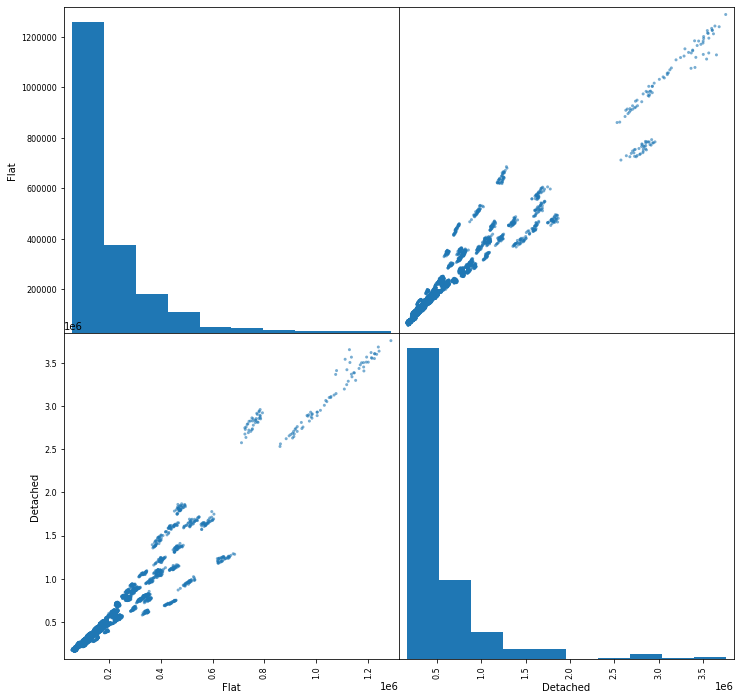

In [ ]:
_a = pd.plotting.scatter_matrix(priceTrends_df1, figsize=(12,12), diagonal='hist', alpha=0.6, range_padding=0.05)
_a

The above output shows that in general, increased cost of flats and detached houses are linearly correlated, and that there are far greater quantities of each type of property at the lower ends of their respective scales.<br>
<br>
The next few steps partition properties by region:

In [ ]:
# Grouping by region
gbyRegion = priceTrends_df1.groupby('RegionName')

region_London = gbyRegion.get_group('London')
region_NE = gbyRegion.get_group('North East')
region_NW = gbyRegion.get_group('North West')
region_SE = gbyRegion.get_group('South East')
region_SW = gbyRegion.get_group('South West')
region_YSTH = gbyRegion.get_group('Yorkshire and The Humber')
region_EEng = gbyRegion.get_group('East of England')
region_WMid = gbyRegion.get_group('West Midlands')
region_EMid = gbyRegion.get_group('East Midlands')
print("Data grouped by region.")

Data grouped by region.


For the 36-month period from September 2016 to August 2019, the combined average prices of flats amd detached houses in England, by region, can be summarised as:

<AxesSubplot:title={'center':'Figure 2: Overview of Average Prices by Region'}, xlabel='Region', ylabel='Average Price x £1000'>

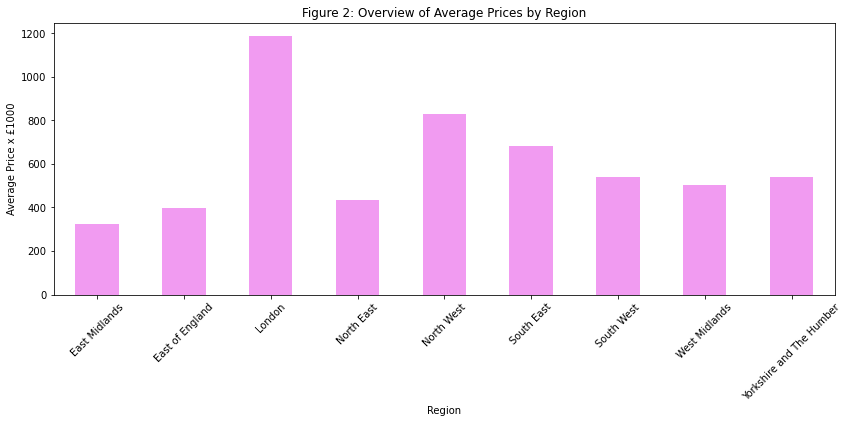

In [ ]:
# Plotting overview
gbyRegion.size().plot(kind='bar', title ='Figure 2: Overview of Average Prices by Region', xlabel='Region', 
                               ylabel='Average Price x £1000', figsize=(14,5), color='violet', rot=45, alpha=0.8)

Univariate summary statistics by region can be observed in the following tables: 

In [ ]:
# Describing by region
def describeBy(groups, columns):
    for (index,grp) in groups:
        print('\nGroup', index)
        print('------------------')
        print(grp.loc[:,columns].describe().round(2))

describeBy(gbyRegion, ['Flat', 'Detached'])


Group East Midlands
------------------
            Flat   Detached
count     324.00     324.00
mean   114557.34  282621.56
std     14492.48   57320.98
min     91136.89  211633.15
25%    101011.98  237763.24
50%    114536.74  256914.98
75%    124578.96  324331.50
max    150465.40  436369.10

Group East of England
------------------
            Flat   Detached
count     396.00     396.00
mean   170154.25  452914.40
std     38848.57  130001.21
min     96143.13  266382.66
25%    139829.37  370316.31
50%    173740.99  456999.04
75%    192719.72  499734.96
max    262197.19  809037.28

Group London
------------------
             Flat    Detached
count     1188.00     1152.00
mean    441912.93  1204456.16
std     210807.40   680623.11
min     221336.36   505505.94
25%     300439.16   772474.25
50%     379946.66   963191.78
75%     481300.35  1377565.15
max    1287156.88  3755824.49

Group North East
------------------
            Flat   Detached
count     432.00     432.00
mean    80755.14  

Creating flats only dataframe :

In [ ]:
# Creating flats df
flats_df1 = date_sorted_df1.filter(['Date', 'Flat', 'AuthorityName', 'RegionName'])
flats_df1[4001:4006]

,Date,Flat,AuthorityName,RegionName
4001,2018-11-01,107928.0258,Walsall,West Midlands
4002,2018-11-01,128863.6476,Isle of Wight,South East
4003,2018-11-01,123471.1834,Coventry,West Midlands
4004,2018-11-01,191648.5836,Trafford,North West
4005,2018-11-01,309982.5887,Windsor and Maidenhead,South East


Creating detached houses only dataframe :

In [ ]:
# Creating detached houses df
detch_df1 = date_sorted_df1.filter(['Date', 'Detached', 'AuthorityName', 'RegionName'])
detch_df1[4001:4006]

,Date,Detached,AuthorityName,RegionName
4001,2018-11-01,271840.0778,Walsall,West Midlands
4002,2018-11-01,320794.6581,Isle of Wight,South East
4003,2018-11-01,355318.3186,Coventry,West Midlands
4004,2018-11-01,538815.4748,Trafford,North West
4005,2018-11-01,907436.3848,Windsor and Maidenhead,South East


Grouping flats and detached houses by region:

In [ ]:
# Grouping flats by region
gbyFlatsRegion = flats_df1.groupby('RegionName')

flats_London = gbyFlatsRegion.get_group('London')
flats_NE = gbyFlatsRegion.get_group('North East')
flats_NW = gbyFlatsRegion.get_group('North West')
flats_SE = gbyFlatsRegion.get_group('South East')
flats_SW = gbyFlatsRegion.get_group('South West')
flats_YSTH = gbyFlatsRegion.get_group('Yorkshire and The Humber')
flats_EEng = gbyFlatsRegion.get_group('East of England')
flats_WMid = gbyFlatsRegion.get_group('West Midlands')
flats_EMid = gbyFlatsRegion.get_group('East Midlands')
print("Flats data grouped by region.")

Flats data grouped by region.


In [ ]:
# Grouping detached houses by region
gbyDetchRegion = detch_df1.groupby('RegionName')

detch_London = gbyDetchRegion.get_group('London')
detch_NE = gbyDetchRegion.get_group('North East')
detch_NW = gbyDetchRegion.get_group('North West')
detch_SE = gbyDetchRegion.get_group('South East')
detch_SW = gbyDetchRegion.get_group('South West')
detch_YSTH = gbyDetchRegion.get_group('Yorkshire and The Humber')
detch_EEng = gbyDetchRegion.get_group('East of England')
detch_WMid = gbyDetchRegion.get_group('West Midlands')
detch_EMid = gbyDetchRegion.get_group('East Midlands')
print("Detached houses data grouped by region.")

Detached houses data grouped by region.


<AxesSubplot:title={'center':'Figure 3: 36-month Flat Average Price by Region'}, xlabel='Region', ylabel='Average Flat Price x £1000'>

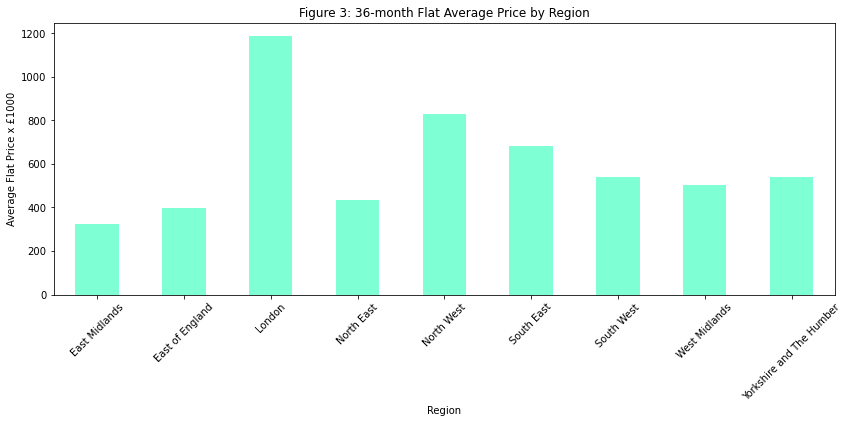

In [ ]:
# Plotting 36-month flat average by region
gbyFlatsRegion.size().plot(kind='bar', title ='Figure 3: 36-month Flat Average Price by Region', xlabel='Region', 
                               ylabel='Average Flat Price x £1000', figsize=(14,5), color='aquamarine', rot=45)

<AxesSubplot:title={'center':'Figure 4: 36-month Detached House Average Price by Region'}, xlabel='Region', ylabel='Average Detached House Price x £1000'>

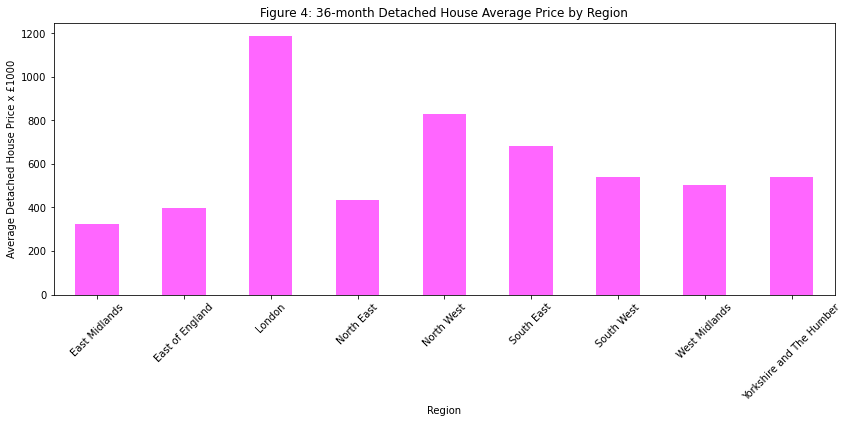

In [ ]:
# Plotting 36-month detached house average by region
gbyDetchRegion.size().plot(kind='bar', title ='Figure 4: 36-month Detached House Average Price by Region', xlabel='Region', 
                               ylabel='Average Detached House Price x £1000', figsize=(14,5), color='magenta', rot=45, alpha=0.6)

### **Section 3.2: Visualisation of Property Price Trends**

Over the entire 36-month period, flactuations and trends in flat and detached house prices can be visualised according to region as:

Text(0, 0.5, 'Price in £')

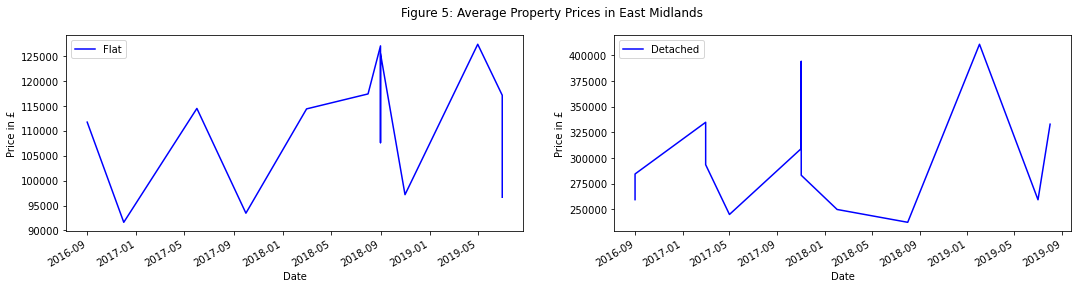

In [ ]:
# Plotting East Midlands prices
fig, (a1, a2) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_EMid.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a1, color='blue')
detch_EMid.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a2, color='blue')

fig.suptitle('Figure 5: Average Property Prices in East Midlands')
[a.set_title('') for a in [a1, a2]]
a1.set_ylabel('Price in £')
a2.set_ylabel('Price in £')

Text(0, 0.5, 'Price in £')

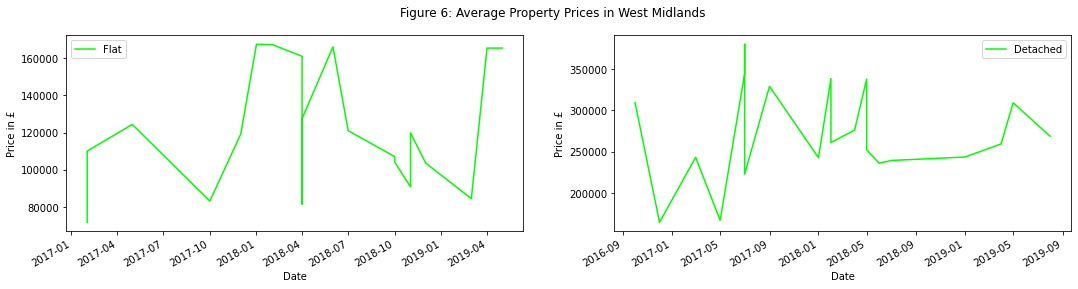

In [ ]:
# Plotting West Midlands prices
fig, (a3, a4) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_WMid.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a3, color='lime')
detch_WMid.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a4, color='lime')

fig.suptitle('Figure 6: Average Property Prices in West Midlands')
[a.set_title('') for a in [a3, a4]]
a3.set_ylabel('Price in £')
a4.set_ylabel('Price in £')

Text(0, 0.5, 'Price in £')

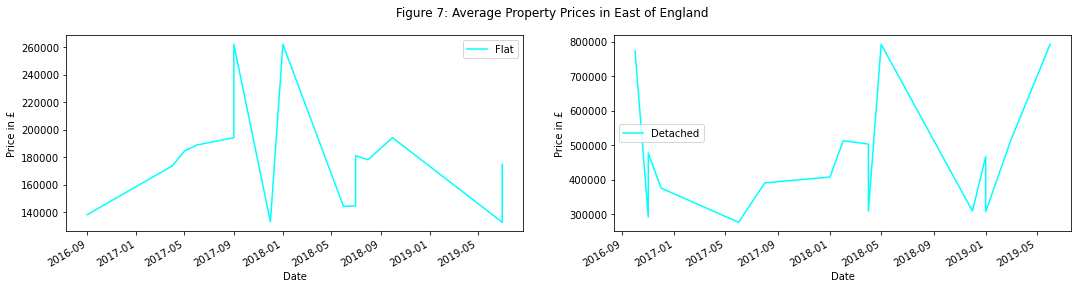

In [ ]:
# Plotting East of England prices
fig, (a5, a6) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_EEng.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a5, color='cyan')
detch_EEng.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a6, color='cyan')

fig.suptitle('Figure 7: Average Property Prices in East of England')
[a.set_title('') for a in [a5, a6]]
a5.set_ylabel('Price in £')
a6.set_ylabel('Price in £')

Text(0, 0.5, 'Price in £')

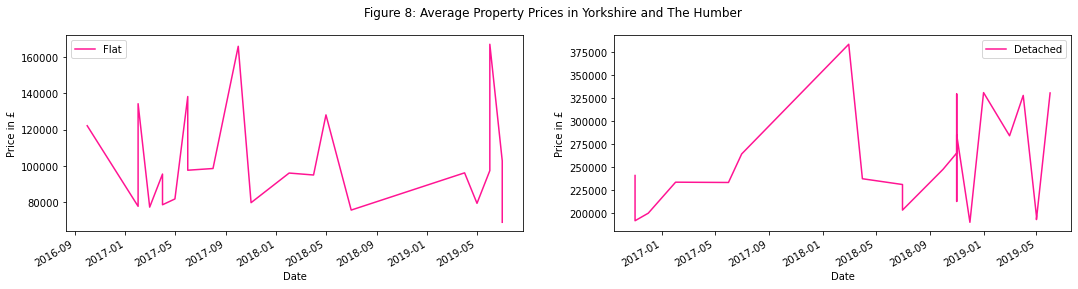

In [ ]:
# Plotting Yorkshire and The Humber prices
fig, (a7, a8) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_YSTH.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a7, color='deeppink')
detch_YSTH.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a8, color='deeppink')

fig.suptitle('Figure 8: Average Property Prices in Yorkshire and The Humber')
[a.set_title('') for a in [a7, a8]]
a7.set_ylabel('Price in £')
a8.set_ylabel('Price in £')

Text(0, 0.5, 'Price in £')

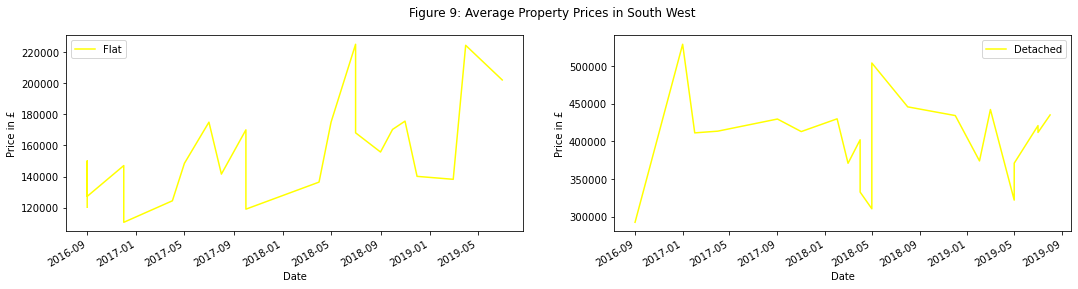

In [ ]:
# Plotting South West prices
fig, (a9, a10) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_SW.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a9, color='yellow')
detch_SW.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a10, color='yellow')

fig.suptitle('Figure 9: Average Property Prices in South West')
[a.set_title('') for a in [a9, a10]]
a9.set_ylabel('Price in £')
a10.set_ylabel('Price in £')

Text(0, 0.5, 'Price in £')

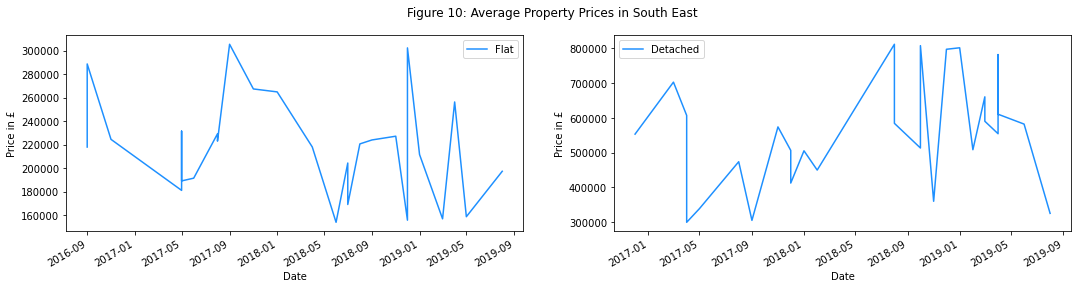

In [ ]:
# Plotting South East prices
fig, (a11, a12) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_SE.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a11, color='dodgerblue')
detch_SE.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a12, color='dodgerblue')

fig.suptitle('Figure 10: Average Property Prices in South East')
[a.set_title('') for a in [a11, a12]]
a11.set_ylabel('Price in £')
a12.set_ylabel('Price in £')

Text(0, 0.5, 'Price in £')

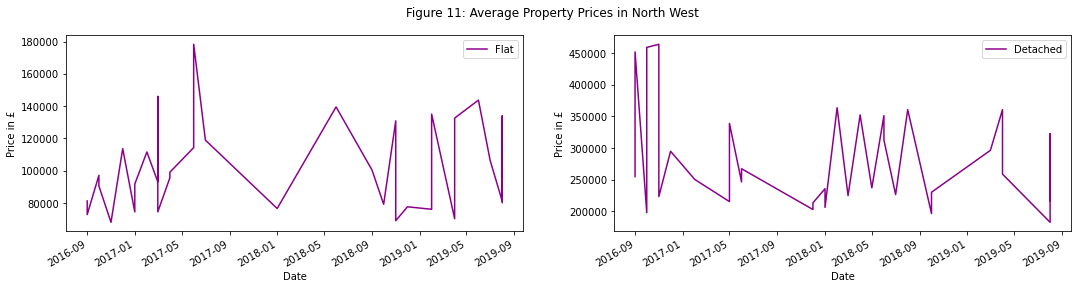

In [ ]:
# Plotting North West prices
fig, (a13, a14) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_NW.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a13, color='darkmagenta')
detch_NW.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a14, color='darkmagenta')

fig.suptitle('Figure 11: Average Property Prices in North West')
[a.set_title('') for a in [a13, a14]]
a13.set_ylabel('Price in £')
a14.set_ylabel('Price in £')

Text(0, 0.5, 'Price in £')

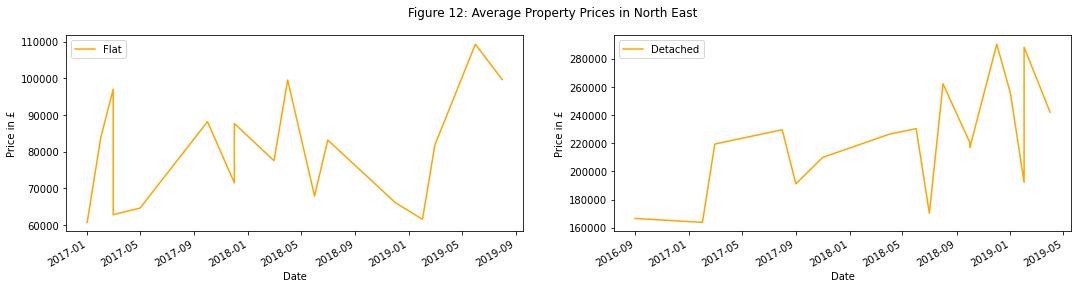

In [ ]:
# Plotting North East prices
fig, (a15, a16) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_NE.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a15, color='orange')
detch_NE.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a16, color='orange')

fig.suptitle('Figure 12: Average Property Prices in North East')
[a.set_title('') for a in [a15, a16]]
a15.set_ylabel('Price in £')
a16.set_ylabel('Price in £')

Text(0, 0.5, 'Price in £million')

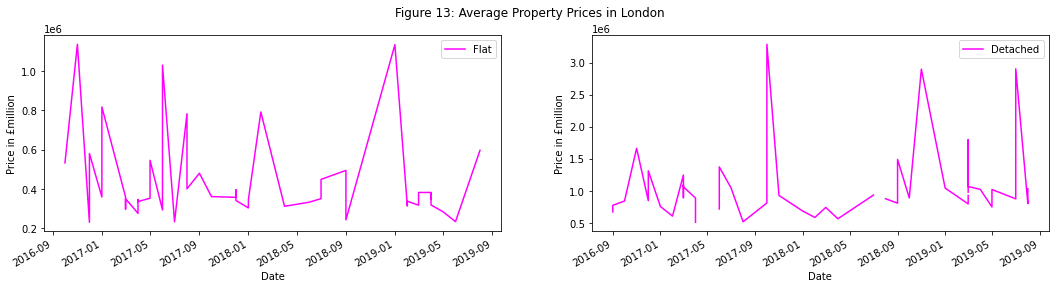

In [ ]:
# Plotting London prices
fig, (a17, a18) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(18,4))

flats_London.sample(frac=0.04).plot(kind="line", x='Date', y='Flat', ax=a17, color='magenta')
detch_London.sample(frac=0.04).plot(kind="line", x='Date', y='Detached', ax=a18, color='magenta')

fig.suptitle('Figure 13: Average Property Prices in London')
[a.set_title('') for a in [a17, a18]]
a17.set_ylabel('Price in £million')
a18.set_ylabel('Price in £million')

**Comments**<br>
The spiky nature of the plots above make trends difficlut to deduce. It can however be observed that in general detached houses are about 3 to 4 times the price of flats in all regions. As expected, in all areas the prices of the 2 types of property were directly correlated. In general, with the exception of a few regions, for most regions over the 36-month peroid there was hardly any change in property price -  the price of property in September 2016 was about the same as it was in August 2019.<br>
<br>
The price of detached houses in the East Midlands increased dramatically from around £230,000 to around £400,000 over the 36-month period. While flat prices actually decreased in Yorkshire and The Humber from about £160,000 to about £95,000 , detached houses in the same region increased in price from about £240,000 to £350,00. This observed trend is completely reversed in the South East region, where average flat prices **rose** from about £220,000 to about £300,000 in the same time period, whilst average prices of detached houses **fell** from about £860,000 to about £500,000.<br>
<br>
The relatively less expensive properties were in the North East where an average of about £80,000 would buy a flat (from about a £58,000 start), and £240,000 an average detached house (from about a £160,000 start). This is contrasted with the London region where flats **start** at £240,000 and average close to £500,000, whilst detached houses start at £500,000 and average £1.2 million.

### **Section 4: Price Changes by Area**
### **Section 4.1: Flat Price Changes between July 2017 and July 2018**

Calculating the change in price of flats for all areas between July 2017 and July 2018:

In [ ]:
# Listing areas
flats_df1.AuthorityName.unique()

array(['Hartlepool', 'Merton', 'Trafford', 'Surrey', 'Wiltshire',
       'North Lincolnshire', 'Barnsley', 'Darlington', 'Westminster',
       'Croydon', 'Bournemouth', 'Norfolk', 'Wolverhampton',
       'Bracknell Forest', 'Wigan', 'Cornwall', 'Birmingham',
       'North East Lincolnshire', 'Wandsworth', 'Harrow', 'Bradford',
       'Southampton', 'Torbay', 'Portsmouth', 'Central Bedfordshire',
       'South Gloucestershire', 'Derby', 'Bromley', 'Warwickshire',
       'Calderdale', 'Stockton-on-Tees', 'Tameside', 'Leicestershire',
       'Cambridgeshire', 'Plymouth', 'Havering', 'Bedford', 'York',
       'West Berkshire', 'Somerset', 'Sunderland', 'Camden',
       'Buckinghamshire', 'Lincolnshire', 'Ealing', 'Northamptonshire',
       'Poole', 'Nottinghamshire', 'Greenwich', 'Warrington', 'Sutton',
       'Luton', 'Blackpool', 'Thurrock', 'Sandwell', 'Cheshire East',
       'Oxfordshire', 'Hackney', 'Sefton', 'St. Helens',
       'Hammersmith and Fulham', 'Richmond upon Thames', 'Sout

In [ ]:
# Counting areas
flats_df1.AuthorityName.value_counts()

Hartlepool              36
Sheffield               36
Cheshire East           36
Leeds                   36
County Durham           36
                        ..
Rotherham               36
Hillingdon              36
Central Bedfordshire    36
Derby                   36
Milton Keynes           36
Name: AuthorityName, Length: 151, dtype: int64

Creating dataframes specific for July 2017 and July 2018:

In [ ]:
# Filtering for July 2017
begin = '2017-7-1'
end = '2017-8-1'

within1 = flats_df1['Date'] >= begin
within2 = flats_df1['Date'] <= end
between1 = within1 & within2
flatsJuly17 = flats_df1.loc[between1]
flatsJuly17.iloc[16:21]

,Date,Flat,AuthorityName,RegionName
1526,2017-07-01,132403.20710,Norfolk,East of England
1527,2017-07-01,77204.18773,Wigan,North West
1528,2017-07-01,483279.60770,Richmond upon Thames,London
1529,2017-07-01,169534.14610,South Gloucestershire,South West
1530,2017-07-01,298083.32630,Redbridge,London


In [ ]:
# Copying for later use before alteration
flatsJuly17_df3 = flatsJuly17.copy()
print("Copy created.")

Copy created.


In [ ]:
# Filtering for July 2018
begin = '2018-7-1'
end = '2018-8-1'

within3 = flats_df1['Date'] >= begin
within4 = flats_df1['Date'] <= end
between2 = within3 & within4
flatsJuly18 = flats_df1.loc[between2]
flatsJuly18.iloc[16:21]

,Date,Flat,AuthorityName,RegionName
3338,2018-07-01,406127.0378,Brent,London
3339,2018-07-01,436340.3653,Southwark,London
3340,2018-07-01,177230.7211,Central Bedfordshire,East of England
3341,2018-07-01,359235.8938,Waltham Forest,London
3342,2018-07-01,642151.2798,Hammersmith and Fulham,London


In [ ]:
# Copying for later use before alteration
flatsJuly18_df3 = flatsJuly18.copy()
print("Copy created.")

Copy created.


In [ ]:
# Resetting index for subsequent substraction
flatsJuly17.reset_index(drop=True, inplace=True)
flatsJuly18.reset_index(drop=True, inplace=True)
print("Indexes reset.")

Indexes reset.


In [ ]:
# Renaming columns for subsequent substraction
flatsJuly17 = flatsJuly17.rename(columns={'Flat': 'Flat1'})
flatsJuly18 = flatsJuly18.rename(columns={'Flat': 'Flat2'})
print("Columns renamed.")

Columns renamed.


In [ ]:
# Creating dataframe for subsequent substraction
JulyDiff = flatsJuly18.copy()

Creating new column with flat prices difference from July 2017 to July 2018:

In [ ]:
# Calculating difference
JulyDiff['Flat1'] = flatsJuly17['Flat1']
JulyDiff['Price_diff'] = np.where(JulyDiff['Flat2'] == flatsJuly17['Flat1'], 0, JulyDiff['Flat2'] - flatsJuly17['Flat1'])
JulyDiff.iloc[101:106]

,Date,Flat2,AuthorityName,RegionName,Flat1,Price_diff
101,2018-07-01,125042.0274,Leicestershire,East Midlands,3.213143e+05,-196272.30210
102,2018-07-01,219631.1564,Oxfordshire,South East,2.220514e+05,-2420.29040
103,2018-07-01,168753.0809,Medway,South East,1.151310e+06,-982557.27410
104,2018-07-01,163317.6307,Gloucestershire,South West,2.701165e+05,-106798.89540
105,2018-07-01,121004.5793,Coventry,West Midlands,7.305407e+04,47950.51045


The calculated change in price of flats in each area between July 2017 and July 2018 in increasing order of magnitude (i.e. from the greatest decrease through no change to the greatest increase) is:

In [ ]:
# Filtering price difference by area
JulyDiff2 = JulyDiff.filter(['AuthorityName', 'Price_diff'])
sorted_JulyDiff2 = JulyDiff2.sort_values('Price_diff', ascending=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sorted_JulyDiff2)

                    AuthorityName    Price_diff
223              Stockton-on-Tees -1.024572e+06
103                        Medway -9.825573e+05
43                      Wokingham -7.749213e+05
214                Northumberland -7.571594e+05
39                   Peterborough -6.787524e+05
218                      Plymouth -6.649766e+05
224                        Newham -6.311262e+05
292                       Rutland -5.421658e+05
11                         Torbay -5.296780e+05
33                       Plymouth -4.815376e+05
64                  Middlesbrough -4.725862e+05
36                  Tower Hamlets -4.150532e+05
208                    Birmingham -4.144417e+05
202                        Slough -3.712753e+05
173            North Lincolnshire -3.633155e+05
294                        Medway -3.584432e+05
79                          Derby -3.416893e+05
78                       Knowsley -3.308047e+05
201                    St. Helens -3.275974e+05
61                     Sunderland -3.246

For each region, the calculated change in flat prices in increasing order of magnitude (i.e. from the greatest decrease through no change to the greatest increase) are:

In [ ]:
# Filtering price difference by region
JulyDiff3 = JulyDiff.filter(['RegionName', 'Price_diff'])
gbyJulyDiffRegion = JulyDiff3.groupby('RegionName')
sum_gbyJulyDiffRegion = gbyJulyDiffRegion['Price_diff'].sum()
sorted_gbyJulyDiffRegion = sum_gbyJulyDiffRegion.sort_values(ascending=True)
sorted_gbyJulyDiffRegion

RegionName
North East                 -4.848871e+06
North West                 -2.561836e+06
South West                 -2.387127e+06
East Midlands              -2.316606e+06
Yorkshire and The Humber   -2.026752e+06
West Midlands              -1.317929e+06
East of England            -8.293661e+05
South East                 -7.183755e+05
London                      1.640024e+07
Name: Price_diff, dtype: float64

In [ ]:
type(sorted_gbyJulyDiffRegion)

pandas.core.series.Series

In [ ]:
type(JulyDiff3)

pandas.core.frame.DataFrame

### **Section 4.2: Visualisation of Change in Flat Prices by Area**<br>
<br>
The change in average flat price between July 2017 and July 2018 can be viewd by area as:

<AxesSubplot:title={'center':'Figure 14: Change in Average Flat Prices by Area'}, xlabel='Area', ylabel='Change in Average Flat Price in £'>

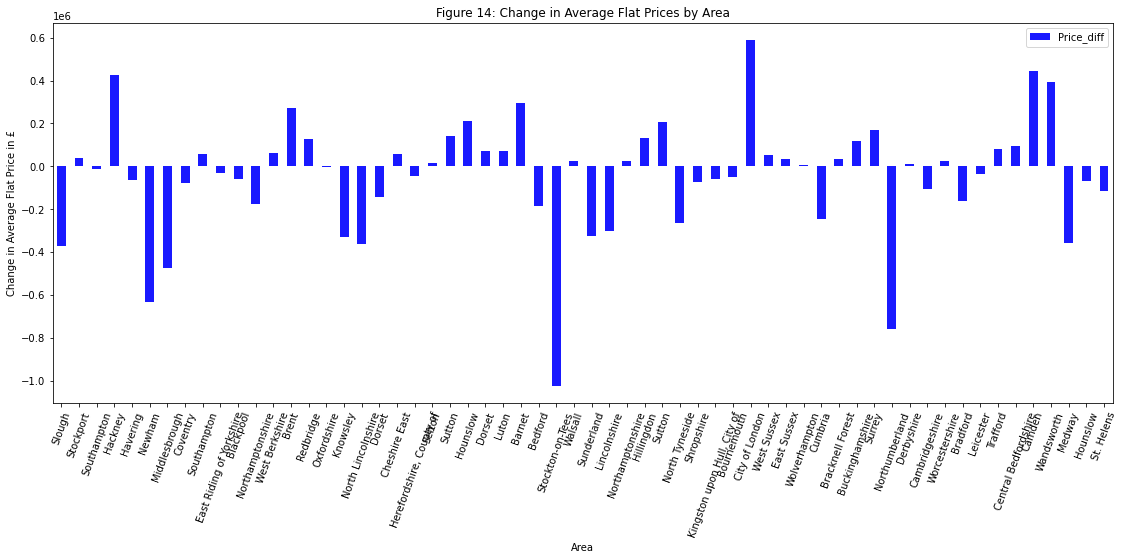

In [ ]:
# Visualising price difference by area
JulyDiff2.sample(frac=0.20).plot(kind="bar", x="AuthorityName", y='Price_diff', logy=False,  
                                xlabel='Area', title ='Figure 14: Change in Average Flat Prices by Area', 
                                ylabel='Change in Average Flat Price in £', figsize=(19,7), color='blue', rot=70, alpha=0.9)

**Comment**<br>
The shear number of areas make meaningful visualisation difficult. Any visualisation therefore requires taking a sample, which yields different plots with each run of the code.<br>
<br>
The outputs however indicate that between July 2017 and July 2018 only areas in the London region had a price increase cummulatively, while areas in all other regions experienced decreased flat prices cummulatively. Also, the greatest decreases were in areas in the North East followed by the North West, South West and East Midlands in decreasing order of price decrease.<br>
<br>
Areas that experienced the highest decrease in flat prices during this period are Stockton-on-Tees, Medway, Wokinghan, Northumberland. Peterborough, Plymouth and Newham (in London). Wirral, Northumberland, Warrington and Oxfordshire experienced the least decreases in flat prices. The least increase in flat prices were in the areas of Thurrock, Isle of Wight, Wolverhampton Gateshead and Wakefield. The areas with the highest increases were Islington, Camden, Westminster and Kensington and Chelsea. The highest 37 increases in flat prices were in areas in and immediately around London. 

### **Section 5: Statistical Analysis**<br>
For evidence that the change in the price of flats affected all the regions
similarly, analysis would be carried out by cross-tabulation and a chi-square test.<br>
<br>
### **Section 5.1: Cross-tabulation**<br>
The next few steps create requisite dataframes for cross-tabulating the areas of price increase with areas of price decrease by region:

In [ ]:
# Filtering regions and renaming columns 
crostab_EMid = JulyDiff3[JulyDiff3['RegionName'].str.startswith('East Midlands')]
crostab_EMid = crostab_EMid.rename(columns={'RegionName': 'East_MidL'})
crostab_EMid.reset_index(drop=True, inplace=True)
crostab_EMid.unstack(level=0).reset_index()

crostab_WMid = JulyDiff3[JulyDiff3['RegionName'].str.startswith('West Midlands')]
crostab_WMid = crostab_WMid.rename(columns={'RegionName': 'West_MidL'})
crostab_WMid.reset_index(drop=True, inplace=True)
crostab_WMid.unstack(level=0).reset_index()

crostab_EEng = JulyDiff3[JulyDiff3['RegionName'].str.startswith('East of England')]
crostab_EEng = crostab_EEng.rename(columns={'RegionName': 'East_Eng'})
crostab_EEng.reset_index(drop=True, inplace=True)
crostab_EEng.unstack(level=0).reset_index()

crostab_YSTH = JulyDiff3[JulyDiff3['RegionName'].str.startswith('Yorkshire and The Humber')]
crostab_YSTH = crostab_YSTH.rename(columns={'RegionName': 'Yorks_HB'})
crostab_YSTH.reset_index(drop=True, inplace=True)
crostab_YSTH.unstack(level=0).reset_index()

crostab_SW = JulyDiff3[JulyDiff3['RegionName'].str.startswith('South West')]
crostab_SW = crostab_SW.rename(columns={'RegionName': 'Sth_West'})
crostab_SW.reset_index(drop=True, inplace=True)
crostab_SW.unstack(level=0).reset_index()

crostab_SE = JulyDiff3[JulyDiff3['RegionName'].str.startswith('South East')]
crostab_SE = crostab_SE.rename(columns={'RegionName': 'Sth_East'})
crostab_SE.reset_index(drop=True, inplace=True)
crostab_SE.unstack(level=0).reset_index()

crostab_NW = JulyDiff3[JulyDiff3['RegionName'].str.startswith('North West')]
crostab_NW = crostab_NW.rename(columns={'RegionName': 'Nth_West'})
crostab_NW.reset_index(drop=True, inplace=True)
crostab_NW.unstack(level=0).reset_index()

crostab_NE = JulyDiff3[JulyDiff3['RegionName'].str.startswith('North East')]
crostab_NE = crostab_NE.rename(columns={'RegionName': 'Nth_East'})
crostab_NE.reset_index(drop=True, inplace=True)
crostab_NE.unstack(level=0).reset_index()

crostab_London = JulyDiff3[JulyDiff3['RegionName'].str.startswith('London')]
crostab_London = crostab_London.rename(columns={'RegionName': 'Lndn'})
crostab_London.reset_index(drop=True, inplace=True)
crostab_London.unstack(level=0).reset_index()

print("Regions dataframes created.")

Regions dataframes created.


Creating "Decrease" column:

In [ ]:
# Filtering decreased regions
crostab_Decreased = JulyDiff3[JulyDiff3['Price_diff'].astype(str).str.startswith('-')]
crostab_Decreased.reset_index(drop=True, inplace=True)
crostab_Decreased.rename(columns={'Price_diff': 'Decrease'}, inplace=True)
crostab_Decreased.head()

C:\Users\KEA\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,RegionName,Decrease
0,London,-128999.5581
1,London,-55552.1791
2,North East,-80966.6758
3,South West,-529677.9980
4,London,-215338.6969


Creating "Increase" column:

In [ ]:
# Filtering increased regions
crostab_Increased = JulyDiff3[~JulyDiff3['Price_diff'].astype(str).str.startswith('-')]
crostab_Increased.reset_index(drop=True, inplace=True)
crostab_Increased.rename(columns={'Price_diff': 'Increase'}, inplace=True)
crostab_Increased.head()

C:\Users\KEA\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,RegionName,Increase
0,North West,13985.84960
1,London,296540.06888
2,South West,79135.61780
3,South West,65843.34174
4,London,260527.46560


A cross-table or contingency table enables computation of the frequency which groups in the table occur. It works on categorical data by grouping the values of one of the columns passed to the crosstab() function and converting those values as an index, while values of the other column passed are grouped as columns. Frequencies of occurence can then be read at intersections. 

### **Section 5.2: Chi-squared Test**<br>
<br>
The Chi-sqaured test can be used to determine if variables in a table are independent of each other in their effects (if any) on a target variable. Its use entails first forming an appropriate null hypothesis - in this case the null hypothesis would be that changes in flat/house prices in diferent regions are independent of each other, with the alternative hypothesis being that they are not independent.<br>
<br>
The expected values for each region are obtained. Then using the formula<br>
$$\chi^2 = \sum \frac {(O - E)^2}{E}$$

a value $\chi^2$ for the Chi-square test is obtained. For 9 regions the degree of freedom (DoF) in this case would be 8. An appropriate significance level $\alpha$ in this case would be 0.05, or 95% confidence level. The final step would be to consult statistical tables at the intersection of $\alpha$ 0.05 and DoF 8.<br>
<br>
If the obtained $\chi^2$ value is smaller than the critical value read from the statistical table, then there is no evidence to reject the null hypothesis, and the null hypothesis is adopted, meaning the flat/house price changes observed in the different regions are independent of each other. If on the other hand the $\chi^2$ value is bigger than the critical value read from the statistical table, then the evidence is that similarities seen in house prices across regions is not due to chance but to an inherent dependence. The null hypothesis is then rejected in favour of the alternative hypothesis.